In [1]:
import torch
import os
import json
import pandas as pd
import numpy as np
import sys

# TODO: CHANGE AS NEEDED
tb_path = os.path.realpath("../TreeBERT")
sys.path.append(tb_path)
# os.chdir(tb_path)

In [2]:
device = torch.device("cuda:0")
# model = torch.load('../TreeBERT/data/output_rerun_rerun_extended.ep49')
# model = model.to(device)
# model.eval();

### Read labels

In [3]:
labels = open('../TreeBERT/pretrain_data_code/java_custom_label/bert_output.json', 'r').readlines()

smells = []

for i in labels:
    test_line = json.loads(i)
    smells.append(test_line["smellKey"])

label_series = pd.Series(smells)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = OneHotEncoder(sparse_output=False)
le = LabelEncoder()

label_numpy = ohe.fit_transform(label_series.to_numpy().reshape(-1, 1))
le.fit_transform(label_series.to_numpy())
label_count = len(ohe.categories_[0])

### Dataloader

In [4]:
# from dataset import BPE, TokenVocab, TreeBERTDataset
# from torch.utils.data import DataLoader
# 
# vocab = TokenVocab.load_vocab("data/vocab.large")
# labeled_dataset = TreeBERTDataset(vocab, "pretrain_data_AST_tmp/java_custom_label/bert_output.json_ast", path_num=100, node_num=20,
#                                     code_len=200, is_fine_tune=False, corpus_lines=None)
# 
# batch_size = 16
# 
# labeled_data_loader = DataLoader(labeled_dataset, batch_size=batch_size)

In [5]:
# import tqdm
# data_iter = tqdm.tqdm(enumerate(labeled_data_loader),
#                               total=len(labeled_data_loader))
# 
# code_data_list = []
# 
# for i, data in data_iter:
#     item = {key: value.to(device) for key, value in data.items()}
# 
#     with torch.no_grad():
#         code_data_list.append(model(item["encoder_input"], item["node_pos_em_coeff"], item["decoder_input"]))

In [6]:
# hudai_data = r"/mnt/c/Users/FSM/Desktop/NIZAM/Embedding/Primitive_Embedding/Data/fn_smell_embeddings.pt"
# hudai_data = torch.load(hudai_data)
# hudai_data.shape

In [7]:
codebert_data = np.fromfile(open("data/codebert_embeds", "r"), np.float32)
codebert_data = codebert_data.reshape(7974, -1)
codebert_data = torch.tensor(codebert_data, device=device, dtype=torch.float32)

In [8]:
# from torch.utils.data import TensorDataset, DataLoader
# 
# labeled_dataset = TensorDataset(codebert_data)
# batch_size = 16
# labeled_data_loader = DataLoader(labeled_dataset, batch_size=batch_size)

### EVALUATE RESULTS

In [9]:
# results = []
# iterator = tqdm.tqdm(enumerate(labeled_data_loader), total=len(labeled_data_loader))
# model_classifier.eval()
# with torch.no_grad():
#     for i, data in iterator:
#         code_data_1d = data[0]
#         result = model_classifier(code_data_1d)
#         results.append(result.detach().cpu().numpy())

In [10]:
# result_table = pd.concat([pd.Series(ohe.inverse_transform(np.vstack(results)).flatten()).value_counts(), label_series.value_counts()], axis=1)
# result_table.columns = ["predicted", "truth"]
# 
# # result_table["ratio"].sum() / result_table["truth"].sum()
# result_table
# # labeled_data_loader
# # label_series__ = label_series[label_series == label_series.iloc[0]]
# 
# np.sum(le.inverse_transform(np.argmax(np.vstack(results), axis=1)) == label_series) / len(label_series)
# # np.argmin(np.abs(np.vstack(results) - 1), axis=1)
# # torch.argmax(torch.tensor(np.vstack(results)), dim=1)
# # results

In [11]:
# np.argmax(np.vstack(results), axis=1).ndim

In [12]:
# print("Opening tensor file")
# fromfile = np.fromfile("../TreeBERT/data/dump/dump.txt", dtype=np.float32)
# print("Opened tensor file")

In [13]:
# fromfile = fromfile.reshape(7974, 202, -1)

In [14]:
most_freq = label_series.value_counts().index[2:5]

top3indices = np.asarray(label_series[label_series.apply(lambda x:x in list(most_freq))].index)

In [15]:
label_series[label_series.apply(lambda x:x in list(most_freq))].value_counts(normalize=True)

java:S1161    0.420085
java:S1172    0.311174
java:S3740    0.268741
Name: proportion, dtype: float64

In [16]:
np.random.RandomState().shuffle(top3indices)
# treebert = torch.tensor(fromfile, dtype=torch.float32, device=device)

In [121]:
import importlib
import math

import model
importlib.reload(model)
import tqdm
from IPython.utils import io


# np.random.RandomState().shuffle(top3indices)
data_ = codebert_data[top3indices]
target_ = model.Label(label_series.iloc[top3indices])
dataset = model.SingleTensorDataset(data_)
test = model.Model(target_, dataset, 64, device)
test.train_multi_label()

EP_test:0: 100%|| 23/23 [00:00<00:00, 305.21it/s]


Epoch [1/100], Loss: 0.7004


EP_test:1: 100%|| 23/23 [00:00<00:00, 346.91it/s]


Epoch [2/100], Loss: 0.6941


EP_test:2: 100%|| 23/23 [00:00<00:00, 332.97it/s]


Epoch [3/100], Loss: 0.6885


EP_test:3: 100%|| 23/23 [00:00<00:00, 258.35it/s]


Epoch [4/100], Loss: 0.6833


EP_test:4: 100%|| 23/23 [00:00<00:00, 266.92it/s]


Epoch [5/100], Loss: 0.6784


EP_test:5: 100%|| 23/23 [00:00<00:00, 344.84it/s]


Epoch [6/100], Loss: 0.6738


EP_test:6: 100%|| 23/23 [00:00<00:00, 334.21it/s]


Epoch [7/100], Loss: 0.6694


EP_test:7: 100%|| 23/23 [00:00<00:00, 381.50it/s]


Epoch [8/100], Loss: 0.6652


EP_test:8: 100%|| 23/23 [00:00<00:00, 366.25it/s]


Epoch [9/100], Loss: 0.6613


EP_test:9: 100%|| 23/23 [00:00<00:00, 340.86it/s]


Epoch [10/100], Loss: 0.6575


EP_test:10: 100%|| 23/23 [00:00<00:00, 341.31it/s]


Epoch [11/100], Loss: 0.6540


EP_test:11: 100%|| 23/23 [00:00<00:00, 387.65it/s]


Epoch [12/100], Loss: 0.6506


EP_test:12: 100%|| 23/23 [00:00<00:00, 367.80it/s]


Epoch [13/100], Loss: 0.6473


EP_test:13: 100%|| 23/23 [00:00<00:00, 375.59it/s]


Epoch [14/100], Loss: 0.6442


EP_test:14: 100%|| 23/23 [00:00<00:00, 378.13it/s]


Epoch [15/100], Loss: 0.6414


EP_test:15: 100%|| 23/23 [00:00<00:00, 386.75it/s]


Epoch [16/100], Loss: 0.6388


EP_test:16: 100%|| 23/23 [00:00<00:00, 395.62it/s]


Epoch [17/100], Loss: 0.6364


EP_test:17: 100%|| 23/23 [00:00<00:00, 351.76it/s]


Epoch [18/100], Loss: 0.6344


EP_test:18: 100%|| 23/23 [00:00<00:00, 375.87it/s]

Epoch [19/100], Loss: 0.6327



EP_test:19: 100%|| 23/23 [00:00<00:00, 380.34it/s]


Epoch [20/100], Loss: 0.6313


EP_test:20: 100%|| 23/23 [00:00<00:00, 409.65it/s]


Epoch [21/100], Loss: 0.6302


EP_test:21: 100%|| 23/23 [00:00<00:00, 373.08it/s]


Epoch [22/100], Loss: 0.6293


EP_test:22: 100%|| 23/23 [00:00<00:00, 388.74it/s]


Epoch [23/100], Loss: 0.6287


EP_test:23: 100%|| 23/23 [00:00<00:00, 430.82it/s]


Epoch [24/100], Loss: 0.6282


EP_test:24: 100%|| 23/23 [00:00<00:00, 409.18it/s]


Epoch [25/100], Loss: 0.6279


EP_test:25: 100%|| 23/23 [00:00<00:00, 377.55it/s]


Epoch [26/100], Loss: 0.6277


EP_test:26: 100%|| 23/23 [00:00<00:00, 394.68it/s]


Epoch [27/100], Loss: 0.6275


EP_test:27: 100%|| 23/23 [00:00<00:00, 407.96it/s]

Epoch [28/100], Loss: 0.6274
Training finished early!


MultiLabelClassifier(
  (linear): Linear(in_features=768, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=3, bias=True)
  (drop): Dropout(p=0.1, inplace=False)
  (act): ReLU()
  (act2): Sigmoid()
)

In [109]:

# bar = tqdm.tqdm(range(1, 40))
# for i in bar:
#     
#     # train_interval = slice(0, math.ceil(len(data_)*0.66))
#     
#     train_indices = np.arange(i * 1)
#     dataset = model.SingleTensorDataset(data_[train_indices])
#     test = model.Model(target_, dataset, 64, device)
#     with io.capture_output() as captured:
#         test.train()
#         loader = torch.utils.data.DataLoader(dataset, 32)
#         acc = test.predict(loader, target_.labels[train_indices])
#     bar.set_postfix_str("Accuracy is:" + str(acc))
#     print("Ratio of the most common label: ", np.max(np.bincount(np.argmax(target_.labels[train_indices], axis=1))) / i)
#     print("---"*15)
        
# data_[0].reshape(-1,1).shape

In [112]:
from torch.utils.data import DataLoader
test_interval = slice(math.ceil(len(data_) * 0.66), -1)

dataset_test = model.SingleTensorDataset(data_[test_interval])

predicts = test.predict(DataLoader(dataset_test, batch_size=16), target_.labels[test_interval])

100%|██████████| 30/30 [00:00<00:00, 610.03it/s]

Accuracy is: 0.3945720250521921


In [113]:
predicts

array([[0.42890817, 0.326041  , 0.27806848],
       [0.4275539 , 0.3204356 , 0.27058694],
       [0.4288886 , 0.3259901 , 0.27797043],
       ...,
       [0.42891136, 0.32603666, 0.2780513 ],
       [0.42861992, 0.3252949 , 0.27689734],
       [0.42851534, 0.32163793, 0.2723458 ]], dtype=float32)

<Axes: ylabel='Count'>

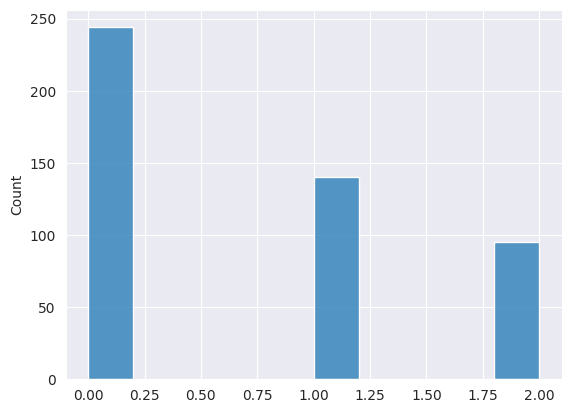

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(np.argmax(np.vstack(predicts), axis=1))

In [59]:
a = [0, 5, 10, 15]
np.asarray(a)[np.arange(0, len(a))]

array([ 0,  5, 10, 15])